In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


In [8]:
teams = pd.read_csv("teams_2023.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [12]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

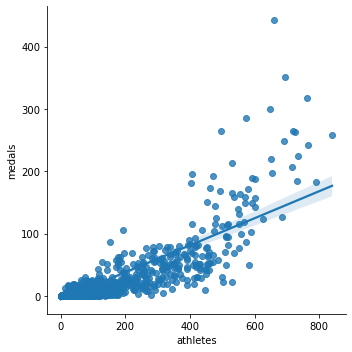

In [14]:
import seaborn as sns
sns.lmplot(x='athletes',y='medals',data=teams) 

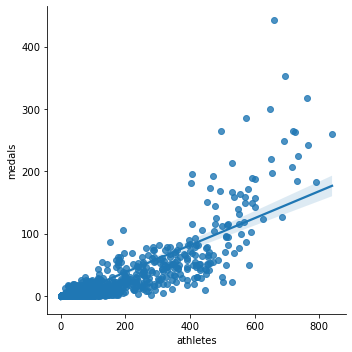

In [16]:
import seaborn as sns
sns.lmplot(x='athletes',y='medals',data=teams) 

<AxesSubplot:ylabel='Frequency'>

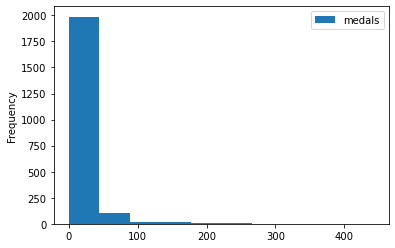

In [18]:
teams.plot.hist(y="medals")

In [19]:
teams.isnull().any(axis=1).head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
dtype: bool

In [20]:
teams[teams.isnull().any(axis=1)].head(200)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [21]:
teams.shape

(2144, 7)

In [24]:
teams = teams.dropna()
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()
train.shape

(1609, 7)

In [25]:
test.shape

(405, 7)

In [26]:
print(teams['team'])

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
2139    ZIM
2140    ZIM
2141    ZIM
2142    ZIM
2143    ZIM
Name: team, Length: 2014, dtype: object


In [27]:
x_train = train[["athletes", "prev_medals"]].copy()
y_train = train[["medals"]].copy()
x_test = test[["athletes", "prev_medals"]].copy()
y_test = test[["medals"]].copy()

x_train["intercept"] = 1
x_test["intercept"] = 1

x_train = x_train[["intercept", "athletes", "prev_medals"]]
x_test = x_test[["intercept", "athletes", "prev_medals"]]

x_test

,intercept,athletes,prev_medals
6,1,6,1.0
7,1,3,1.0
24,1,10,0.0
25,1,6,0.0
37,1,39,2.0
...,...,...,...
2111,1,3,0.0
2131,1,7,0.0
2132,1,7,0.0
2142,1,9,4.0


In [29]:
X_T = x_train.T
X_T

,0,1,2,3,4,5,8,9,10,11,...,2130,2133,2134,2135,2136,2137,2138,2139,2140,2141
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
athletes,8.0,5.0,8.0,11.0,5.0,4.0,4.0,5.0,2.0,4.0,...,8.0,33.0,52.0,20.0,47.0,28.0,21.0,26.0,14.0,16.0
prev_medals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3.0


In [30]:
B = np.linalg.inv(X_T @ x_train) @ X_T @ y_train
B

,medals
0,-2.142069
1,0.071704
2,0.750625


In [31]:
B.index = x_test.columns

x_test
B

,medals
intercept,-2.142069
athletes,0.071704
prev_medals,0.750625


In [32]:
predictions = x_train @ B
predictions

,medals
0,-1.568439
1,-1.783551
2,-1.568439
3,-1.353328
4,-1.783551
...,...
2137,-0.134363
2138,-0.636290
2139,-0.277771
2140,-1.138216


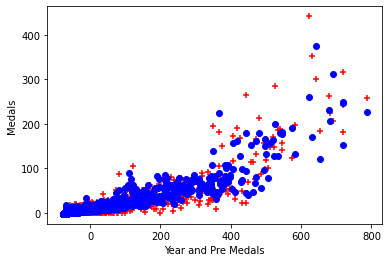

In [33]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=1)
X_2D = pca.fit_transform(x_train)
plt.xlabel('Year and Pre Medals')
plt.ylabel('Medals')
plt.scatter(X_2D, y_train, color='red', marker='+')
plt.scatter(X_2D, predictions, color='blue', marker='o')

In [34]:
x_train

,intercept,athletes,prev_medals
0,1,8,0.0
1,1,5,0.0
2,1,8,0.0
3,1,11,0.0
4,1,5,0.0
...,...,...,...
2137,1,28,0.0
2138,1,21,0.0
2139,1,26,0.0
2140,1,14,0.0


In [35]:
SSR = ((y_test - predictions) ** 2).sum()
SSR

medals    0.0
dtype: float64

In [36]:
TSS = ((y_test - y_test.mean()) ** 2).sum()
TSS

medals    335566.311111
dtype: float64

In [37]:
R2 = 1 - (SSR / TSS)
R2

medals    1.0
dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
lr.intercept_

array([-2.14206946])

In [40]:
lr.coef_

array([[0.        , 0.07170379, 0.75062549]])

In [42]:
predictions = lr.predict(x_test)

y_test["predictions"] = predictions
y_test["predictions"] = y_test["predictions"].round()
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test["medals"], y_test["predictions"])
error

4.232098765432099

In [43]:
r2 = r2_score(y_test["medals"], y_test["predictions"]) 
r2

0.9188416742138861